In [1]:
import os
import cv2
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# Convert and Save Images to Grey Scale

In [46]:
def grey_scale(input_dir,output_dir):
    """ This will convert & save all images in input_dir to grey scale images in other directory
     input_dir : Absolute path of input directory
     output_dir : Absolute path of output directory 
     """

    pwd = os.getcwd()

    img_dir = os.path.join(pwd,input_dir) #get cancer images directory
    images_name = os.listdir(img_dir)

    output_dir = os.path.join(pwd, output_dir)
    print(output_dir)
    
    lis = []

    for x in images_name:
        input_path = os.path.join(img_dir,x)
        output_path = os.path.join(output_dir,x)
        lis.append(output_path)

        img = cv2.imread(input_path)
        grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(output_path,grey)

    print("Conveted and Save images to {0}".format(output_dir))
    
    return lis

In [57]:
lis = grey_scale('cancer','output')
lis2 = grey_scale('pearson','pearson_output')

F:\Program Files\output
Conveted and Save images to F:\Program Files\output
F:\Program Files\pearson_output
Conveted and Save images to F:\Program Files\pearson_output


## Note : OpenCV default protocol is : ```B, G, R```
image stored as numpy.ndarry

## Displaying Images & their Frequency

In [69]:
a = "F:\Program Files\output\ISIC_0000002.jpg"

# for link in lis:
#     img = cv2.imread(link,0)
#     plt.figure()
#     plt.imshow(img, cmap="gray")
#     plt.show()
# BETTER IMPLEMENT BELOW BELOW 

def image_frequency(input_dir,output_dir):
    lis = grey_scale(input_dir,output_dir)
    
    for path in lis:
        img = cv2.imread(path,0)
        plt.figure()
        plt.imshow(img,cmap='gray')
        
        img_vec = img.reshape(1,-1)
        
        hist, binn = np.histogram(img_vec, bins=26,range=(0,260))
        print(hist)
        plt.show()

# image_frequency('cancer', 'output')

# Displaying Histogram & Images (for pearson cut images)

In [52]:
def plot_hist_n_image(input_dir, equalise=False):
    """
    input_dir -> name of input directory where gray scale images are present
    output -> print histogram equalised image and its frequency distribution
    """
    
    
    pwd = os.getcwd()

    img_dir = os.path.join(pwd,input_dir)   # get cancer images directory
    lis = os.listdir(img_dir)
#     print(lis)

    for abs_path in lis:
        path = os.path.join(pwd,input_dir,abs_path)
        img = cv2.imread(path,0)
        
        if equalise:
            img = cv2.equalizeHist(img)
            
        img_vector = img.reshape(1,-1)
        hist, binn = np.histogram(img_vector,bins=26,range=(0,260))

        plt.figure(figsize=(8,5))
        plt.imshow(img, cmap="gray")
        plt.xlabel(abs_path)
        plt.show()

        plt.figure(figsize=(14,6))
        sns.barplot(binn[1:],hist)
        plt.xlabel(abs_path)
        plt.show()
    


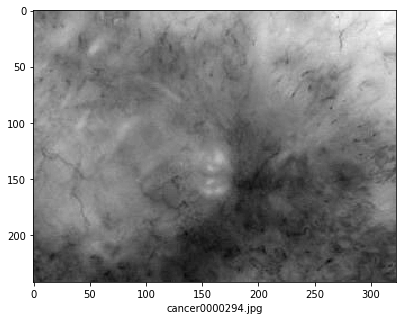

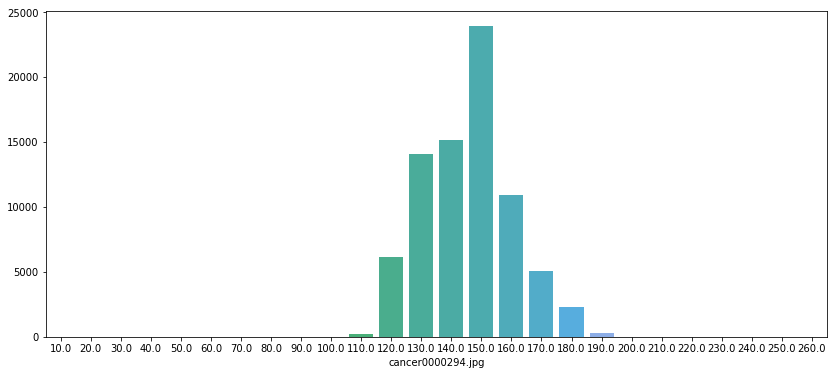

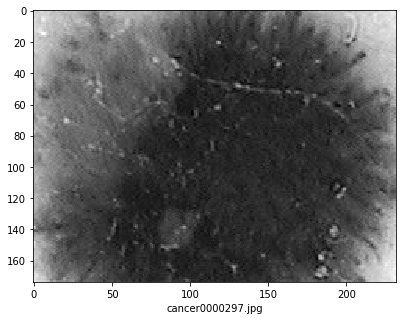

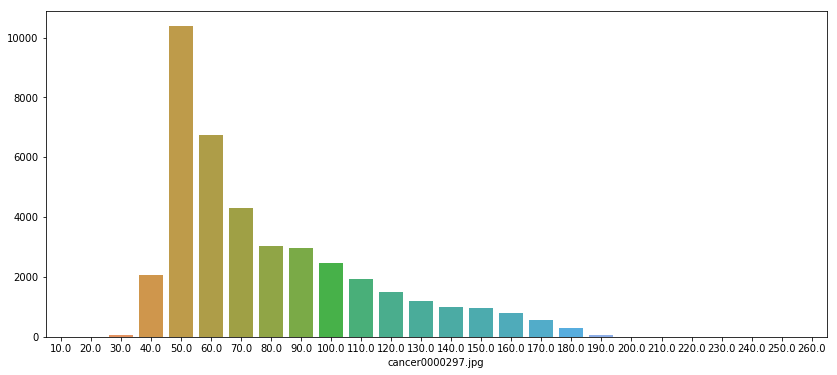

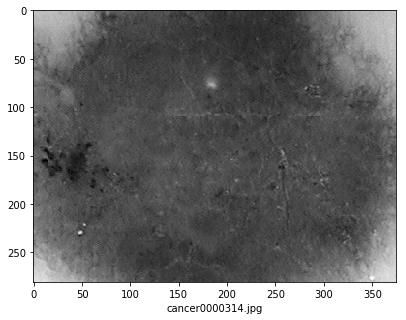

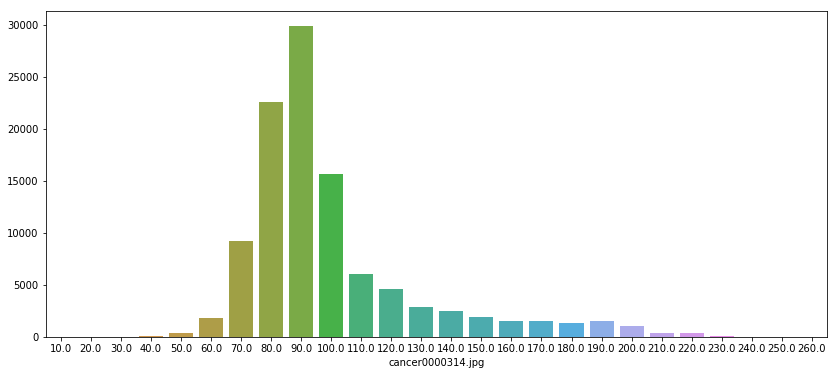

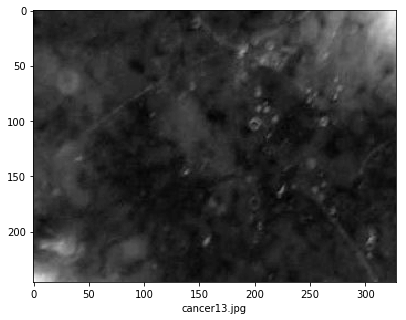

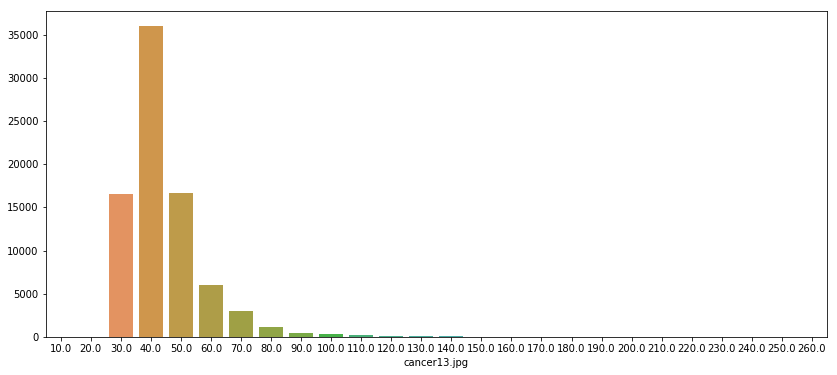

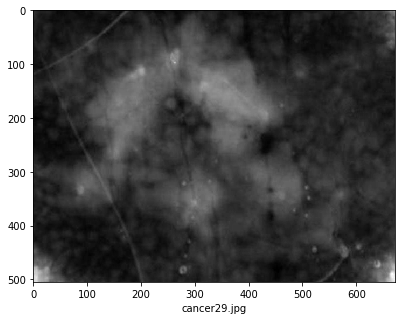

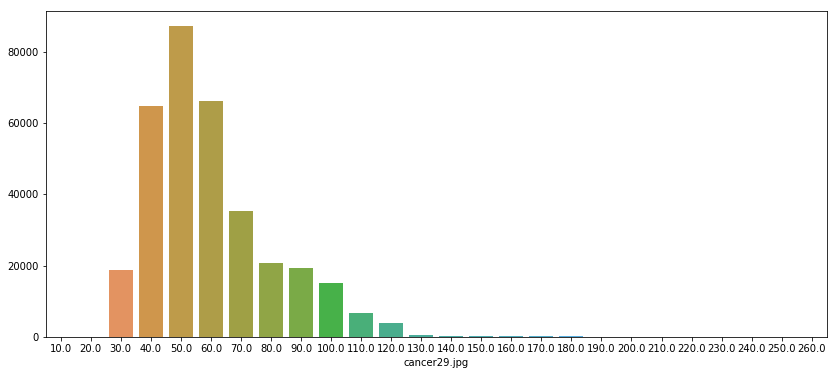

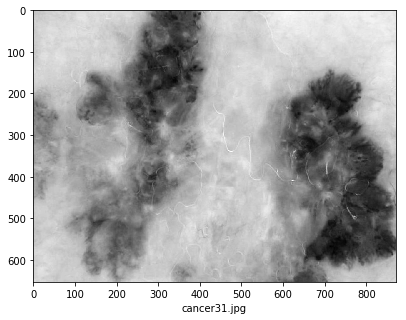

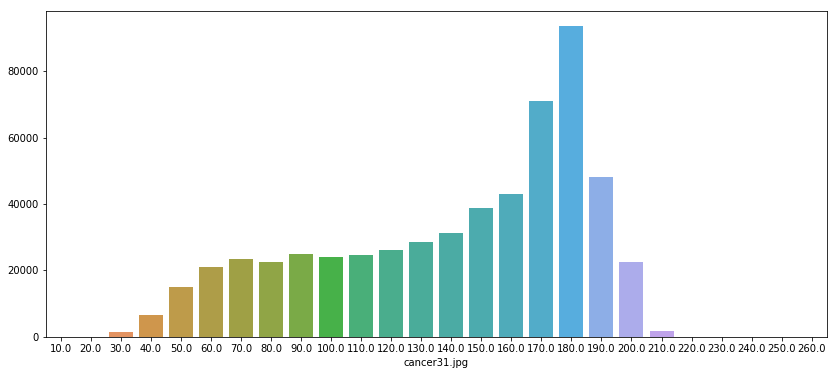

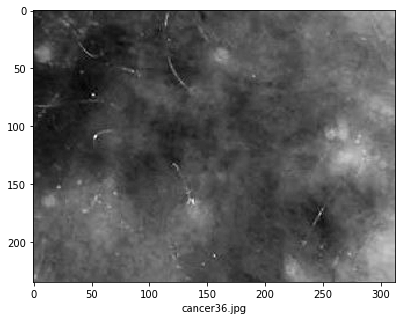

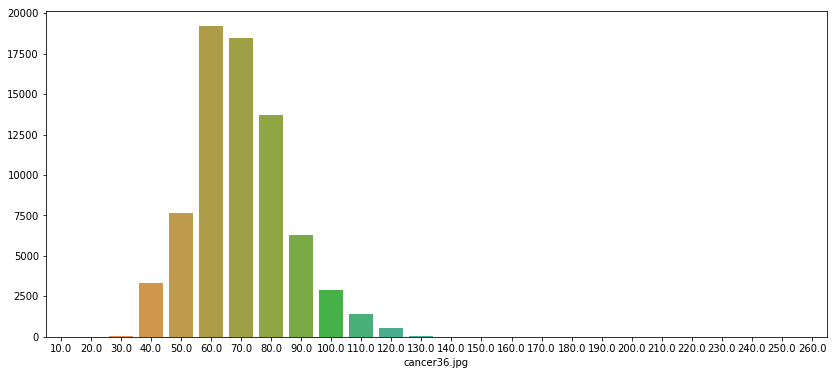

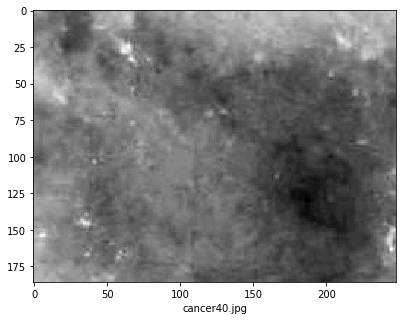

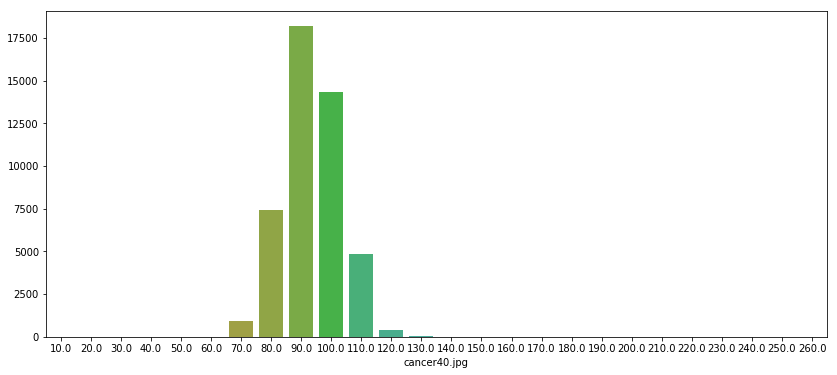

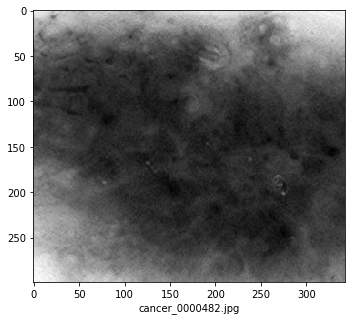

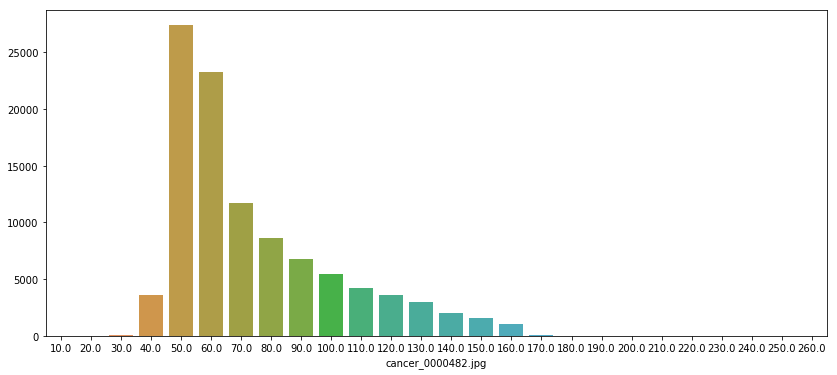

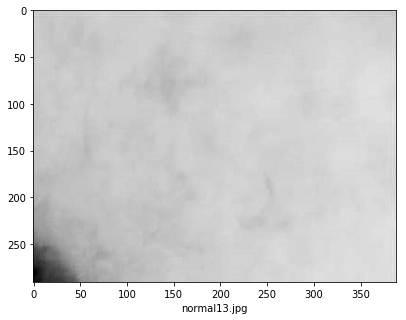

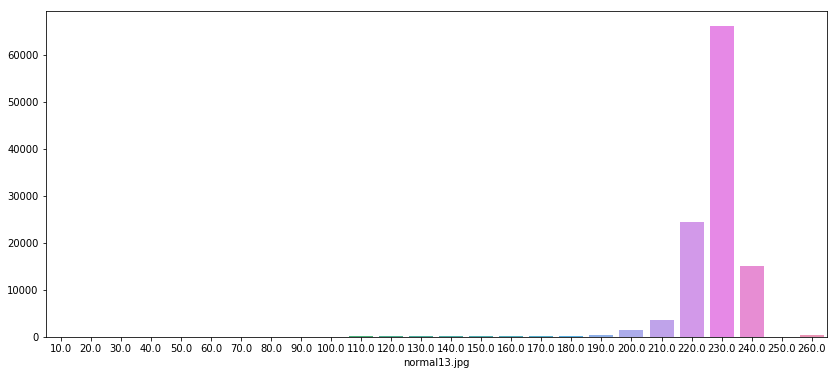

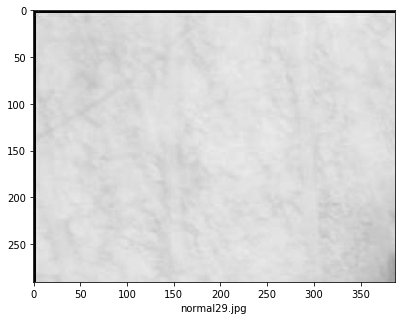

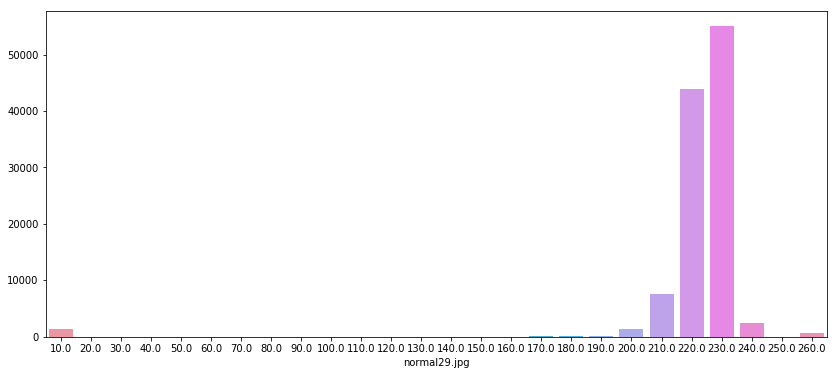

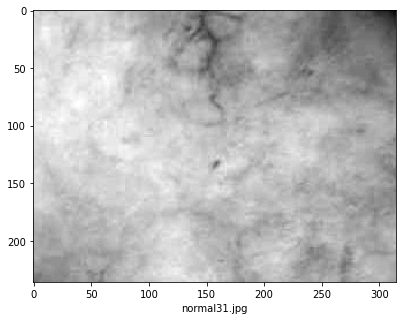

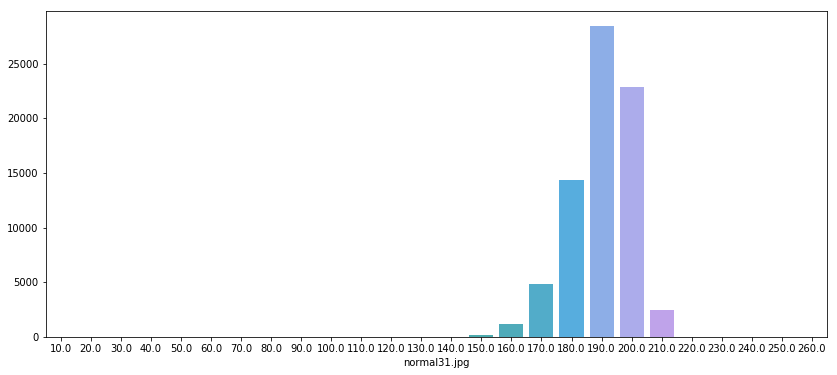

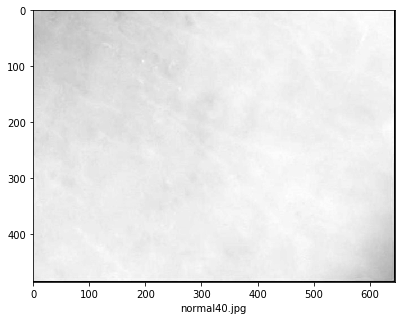

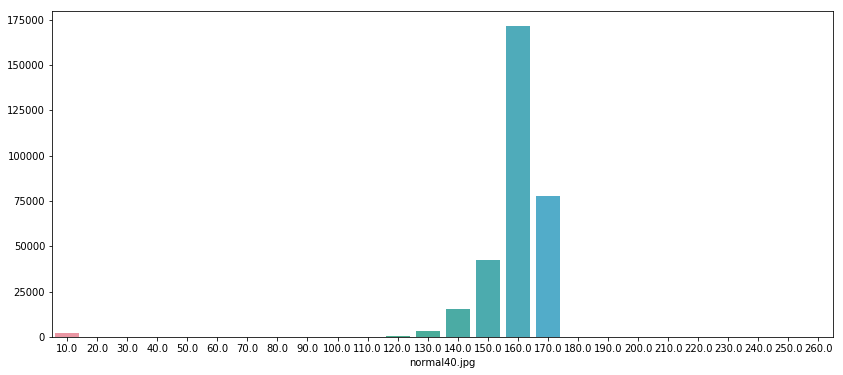

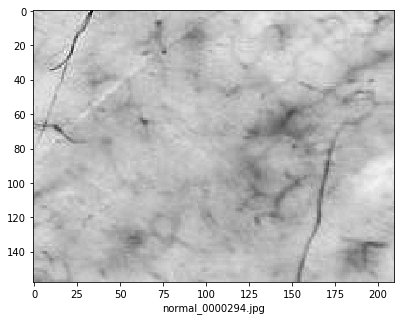

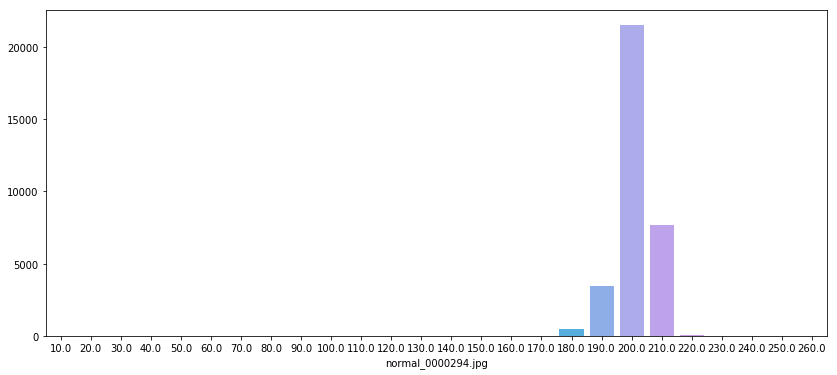

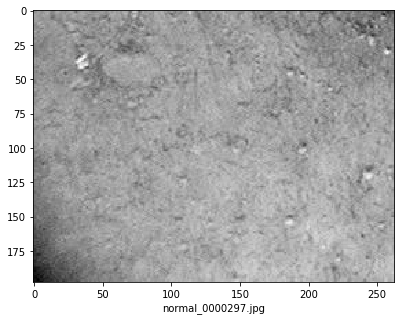

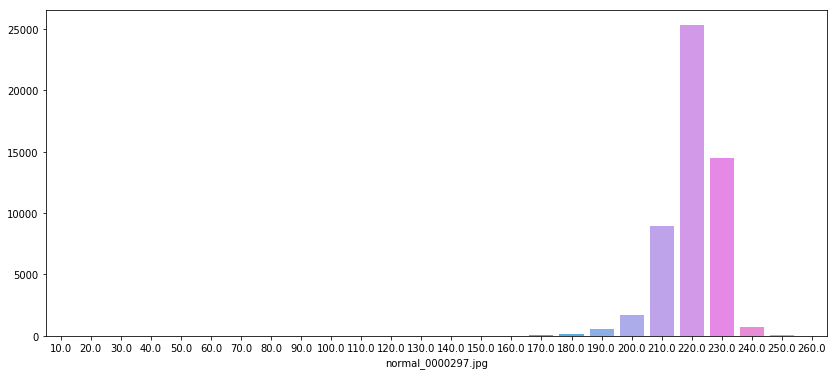

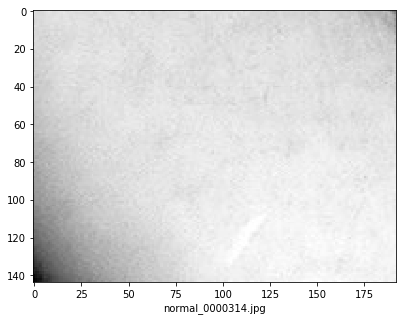

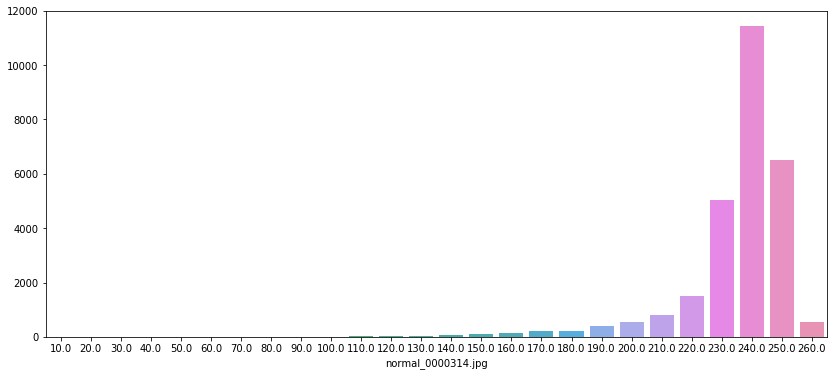

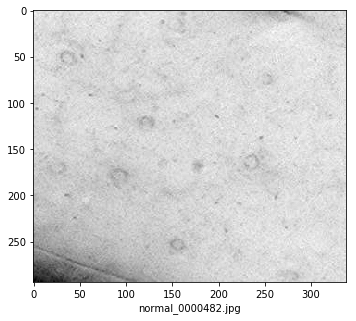

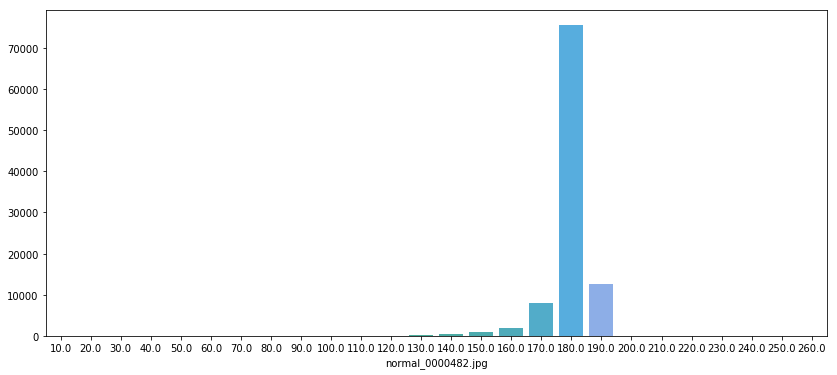

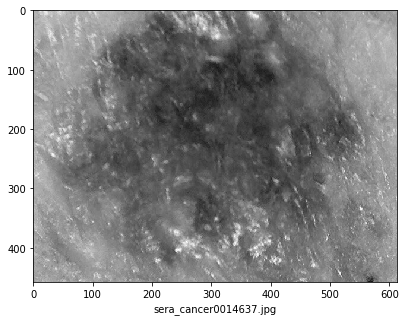

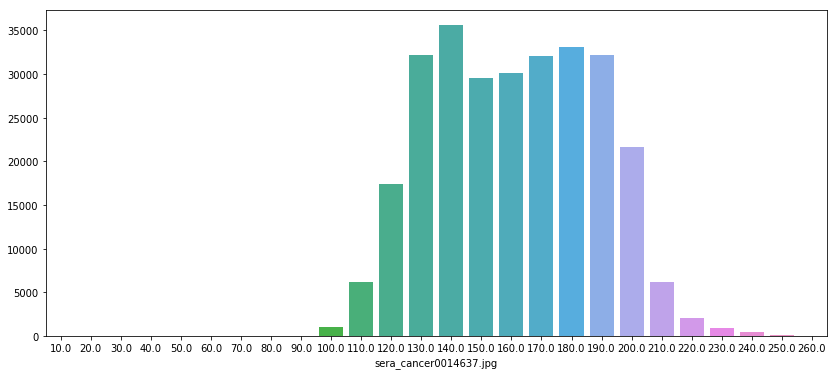

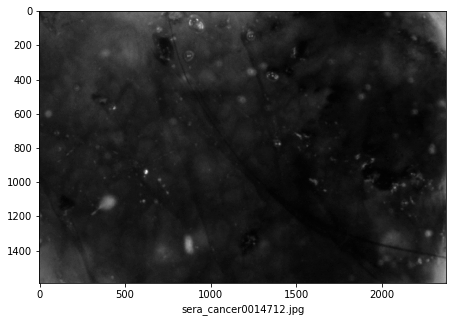

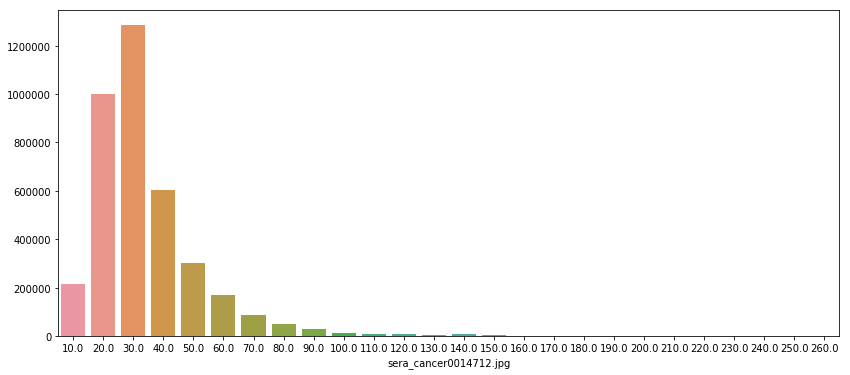

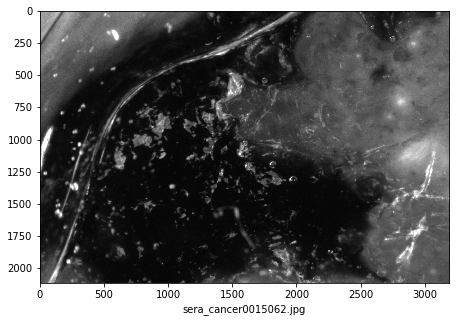

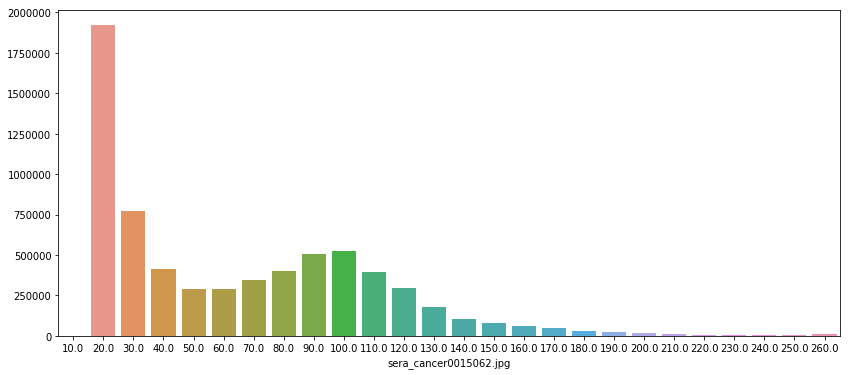

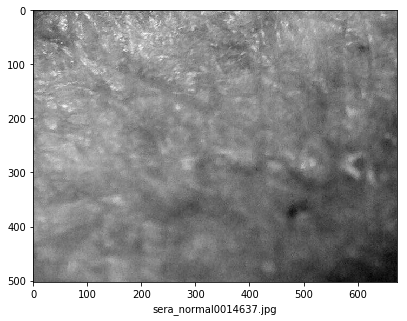

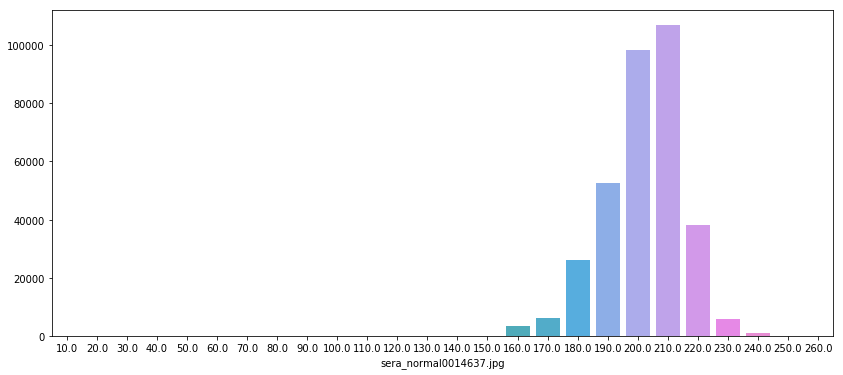

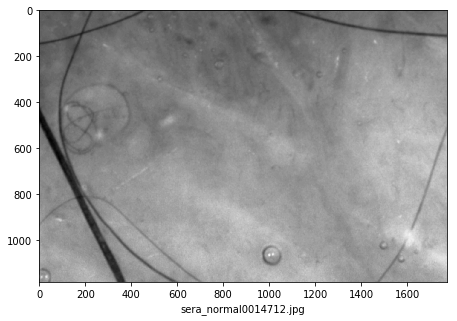

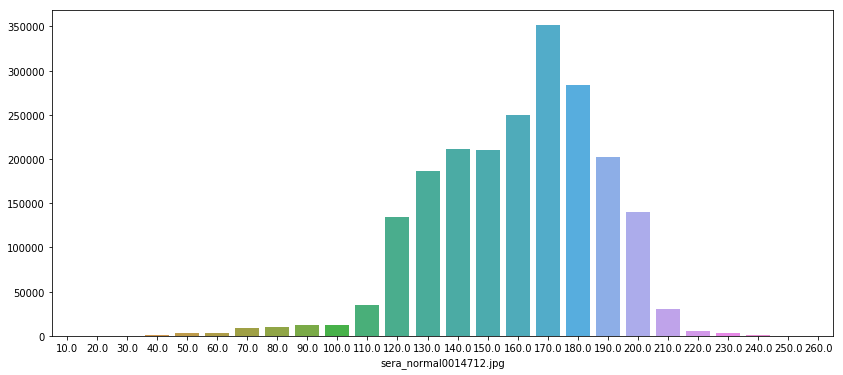

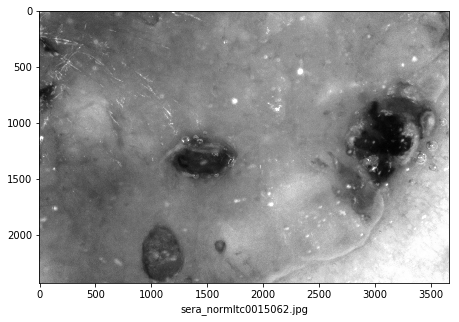

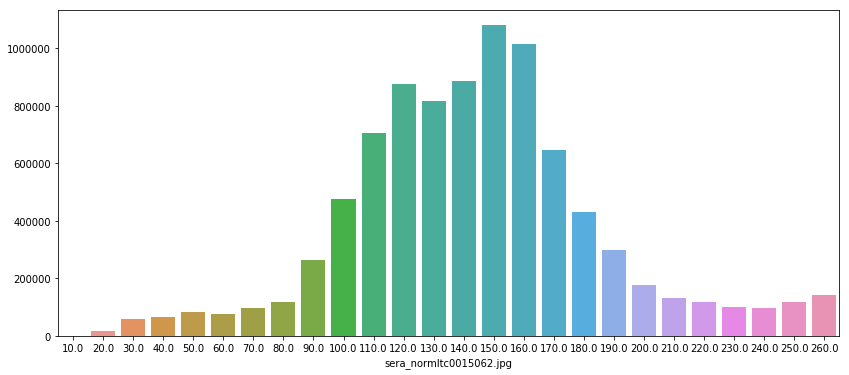

In [72]:
plot_hist_n_image('pearson_output',equalise=False)


## Frequency Distribution equalise/non equalise (PEARSON CUT)

In [67]:

def image_frequency(directory,equalise=False,show=True,ret=True):
    """ 
    directory -> directory of gray scale images('pearson_output')
    
    
    Returns python list of tuples(x,y) 
        x -> name of image
        y -> frequency distribution of image
     """
    
    
    frequency_list = []
        
    pwd = os.getcwd()

    img_dir = os.path.join(pwd,directory)   # get cancer images directory
    lis = os.listdir(img_dir)
#     print(lis)
    
    for abs_path in lis:    # abs_path is name of image
        path = os.path.join(pwd,directory,abs_path)
        img = cv2.imread(path,0)
        
        if equalise:
            img = cv2.equalizeHist(img)
        
        img_vec = img.reshape(1,-1)
        hist, binn = np.histogram(img_vec, bins=26,range=(0,260))
        
        frequency_list.append((abs_path, hist.tolist()))
        
        if show:
            print(hist)       
            plt.figure()
            plt.imshow(img,cmap='gray')
            plt.xlabel(abs_path)
            plt.show()
        
        
    if ret:
        return frequency_list
    else:
        return None
        
        

# image_frequency('pearson_output',equalise=True,show=False)

In [40]:
def pearson_distribution(bins_average, actual_freq_count):
    """Give kappa value """
    import math

    su=0
    
    a = bins_average
    b = actual_freq_count

    c=[]#first sum list
    for num in reversed(b):
        su=su+num
        c.append(su)

#     print(c)
    firstsum=[]
    firstsum=list(reversed(c))
#     print(firstsum)


    secondlist=[]
    su=0

    d=[]
    for num in c:
        su=su+num
        d.append(su)
#     print(d)

    secondsum=list(reversed(d))
#     print(secondsum)

    e=[]
    su=0
    for num in d:
        su=su+num
        e.append(su)
#     print(e)

    thirdsum=list(reversed(e))
#     print(thirdsum)

    f=[]
    su=0
    for num in e:
        su=su+num
        f.append(su)
#     print(f)

    foursum=list(reversed(f))
#     print(foursum)
    s0=sum(b)
    s2=sum(c)/s0
    s3=sum(d)/s0
    s4=sum(e)/s0
    s5=sum(f)/s0
#     print(s2,' ',s3,' ',s4,' ',s5)



    d1=s2
#     print(d1)
    v2=2*s3-d1*(1+d1)
#     print(v2)
    v3=6*s4-3*v2*(1+d1)-d1*(1+d1)*(2+d1)
#     print(v3)


    v4=24*s5-2*v3*(2*(1+d1)+1)-v2*(6*(1+d1)*(2+d1)-1)-d1*(1+d1)*(2+d1)*(3+d1)
#     print(v4)

    meu2=v2-1/12
#     print(meu2)


    meu3=v3
    meu4=v4-0.5*v2+7/240
#     print(meu3," ",meu4)
    sigma=math.sqrt(meu2)
#     print(sigma)

    m1=meu3*meu3
    m2=meu2*meu2

    beta1=m1/m2
#     print(beta1)

    beta2=meu4/m2
#     print(beta2)

    #calculating kappa
    num1=beta1*(beta2+3)*(beta2+3)
    num2=4*(4*beta2-3*beta1)*(2*beta2-3*beta1-6)
    kappa=num1/num2
    return kappa
#     print("value of kappa = ",kappa)

In [41]:
a= [2650, 2001, 2516, 2906, 3218, 3265, 3470, 3631, 3680, 3953 ,   0, 4083, 3786, 3744,
 3641, 3200, 2807, 2506, 4224, 3615, 2860, 3452, 3163, 3225, 3240, 1852]
bi=list(range(5,265,10))
pearson_distribution(bi,a)

-0.019214326424320208

In [73]:
lis = image_frequency('pearson_output',show=False,equalise=False)
bin_average = list(range(5,265,10))

for name, freq_count in lis:
    kappa = pearson_distribution(bin_average,freq_count)
    print(name, " --> ", kappa)

cancer0000294.jpg  -->  -0.08569850701057573
cancer0000297.jpg  -->  0.12208868279906594
cancer0000314.jpg  -->  0.12898123477906223
cancer13.jpg  -->  -2.569282426517475
cancer29.jpg  -->  -4.989678538813777
cancer31.jpg  -->  0.1403045094916186
cancer36.jpg  -->  -0.5142573990275513
cancer40.jpg  -->  -0.016936306950852863
cancer_0000482.jpg  -->  0.19867843600061416
normal13.jpg  -->  -8.289228742966282
normal29.jpg  -->  0.5730519997107826
normal31.jpg  -->  -1.2072450869862748
normal40.jpg  -->  11.68829756442257
normal_0000294.jpg  -->  0.030251289745586267
normal_0000297.jpg  -->  0.2870138304152195
normal_0000314.jpg  -->  1.0880605545230135
normal_0000482.jpg  -->  0.4083805612797451
sera_cancer0014637.jpg  -->  -0.02055776462140813
sera_cancer0014712.jpg  -->  -9.973159666918317
sera_cancer0015062.jpg  -->  0.10643767632964211
sera_normal0014637.jpg  -->  -2.4046778147119654
sera_normal0014712.jpg  -->  -0.597339170447528
sera_normItc0015062.jpg  -->  -0.5925713234768105


26